<h2>Data Preprocessing<h2>

In [239]:
import pandas as pd
import joblib as jb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor as RFR

In [240]:
df=pd.read_csv("PABI PROJECT - jobs_in_data.csv")

In [241]:
df.head() 

,work_year,Date,YEAR,job_title,job_category,salary_currency,Symbols,SALARY,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size,Company's_size
0,2023,1/1/2023,2023,Data DevOps Engineer,Data Engineering,EUR,€,"€ 88,000.00","88,000","$95,012.00",Germany,Mid-level,Full-time,Hybrid,Germany,L,Large
1,2023,1/1/2023,2023,Data Architect,Data Architecture and Modeling,USD,$,"$ 186,000.00","186,000","$186,000.00",United States,Senior,Full-time,In-person,United States,M,Medium
2,2023,1/1/2023,2023,Data Architect,Data Architecture and Modeling,USD,$,"$ 81,800.00","81,800","$81,800.00",United States,Senior,Full-time,In-person,United States,M,Medium
3,2023,1/1/2023,2023,Data Scientist,Data Science and Research,USD,$,"$ 212,000.00","212,000","$212,000.00",United States,Senior,Full-time,In-person,United States,M,Medium
4,2023,1/1/2023,2023,Data Scientist,Data Science and Research,USD,$,"$ 93,300.00","93,300","$93,300.00",United States,Senior,Full-time,In-person,United States,M,Medium


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   Date                9355 non-null   object
 2   YEAR                9355 non-null   int64 
 3   job_title           9355 non-null   object
 4   job_category        9355 non-null   object
 5   salary_currency     9355 non-null   object
 6   Symbols             9355 non-null   object
 7   SALARY              9355 non-null   object
 8   salary              9355 non-null   object
 9   salary_in_usd       9355 non-null   object
 10  employee_residence  9355 non-null   object
 11  experience_level    9355 non-null   object
 12  employment_type     9355 non-null   object
 13  work_setting        9355 non-null   object
 14  company_location    9355 non-null   object
 15  company_size        9355 non-null   object
 16  Company's_size      9355

In [243]:
df.dtypes

work_year              int64
Date                  object
YEAR                   int64
job_title             object
job_category          object
salary_currency       object
Symbols               object
SALARY                object
salary                object
salary_in_usd         object
employee_residence    object
experience_level      object
employment_type       object
work_setting          object
company_location      object
company_size          object
Company's_size        object
dtype: object

<h5><I>salary data type is wrong!!!<I><h5>

In [244]:
df["salary"]=pd.to_numeric(df["salary"].str.replace(r"[^\d\-+\.]", "", regex=True), errors='coerce')
df["salary_in_usd"]=pd.to_numeric(df["salary_in_usd"].str.strip("$").replace(r"[^\d\-+\.]", "", regex=True), errors='coerce')


In [245]:
df.dtypes

work_year               int64
Date                   object
YEAR                    int64
job_title              object
job_category           object
salary_currency        object
Symbols                object
SALARY                 object
salary                  int64
salary_in_usd         float64
employee_residence     object
experience_level       object
employment_type        object
work_setting           object
company_location       object
company_size           object
Company's_size         object
dtype: object

In [246]:
df.rename(columns={"Company's_size": 'Company_size'}, inplace=True)

In [247]:
nullcols=df.columns[df.isnull().any()]
nullcount=df[nullcols].isnull().sum()
print(nullcount)

Series([], dtype: float64)


In [248]:
df.describe()

,work_year,YEAR,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000,9355.000000
mean,2022.760449,2022.760449,149927.981293,150299.495564
std,0.519470,0.519470,63608.835387,63177.372024
min,2020.000000,2020.000000,14000.000000,15000.000000
25%,2023.000000,2023.000000,105200.000000,105700.000000
50%,2023.000000,2023.000000,143860.000000,143000.000000
75%,2023.000000,2023.000000,187000.000000,186723.000000
max,2023.000000,2023.000000,450000.000000,450000.000000


<h2>Modeling<h2>

<h4>Encoding using one hot encoder for converting catagorial data into binary<h4>

In [249]:
x=df.loc[:,["job_title","job_category","employee_residence","experience_level","employment_type","work_setting","company_location","Company_size"]]
Target=df["salary_in_usd"]

In [250]:
Target.head(10)

0     95012.0
1    186000.0
2     81800.0
3    212000.0
4     93300.0
5    130000.0
6    100000.0
7    224400.0
8    138700.0
9    210000.0
Name: salary_in_usd, dtype: float64

In [251]:
x.dtypes

job_title             object
job_category          object
employee_residence    object
experience_level      object
employment_type       object
work_setting          object
company_location      object
Company_size          object
dtype: object

In [252]:
categorical_features=x
num_features=Target

In [253]:
encoded_features = pd.concat([pd.get_dummies(df[col], prefix=col,dtype=int) for col in categorical_features], axis=1) 

In [254]:
print(encoded_features)

      job_title_AI Architect  job_title_AI Developer  job_title_AI Engineer  \
0                          0                       0                      0   
1                          0                       0                      0   
2                          0                       0                      0   
3                          0                       0                      0   
4                          0                       0                      0   
...                      ...                     ...                    ...   
9350                       0                       0                      0   
9351                       0                       0                      0   
9352                       0                       0                      0   
9353                       0                       0                      0   
9354                       0                       0                      0   

      job_title_AI Programmer  job_title_AI Researc

In [255]:
new_features = pd.concat([(encoded_features), num_features], axis=1)

In [256]:
print(new_features)

      job_title_AI Architect  job_title_AI Developer  job_title_AI Engineer  \
0                          0                       0                      0   
1                          0                       0                      0   
2                          0                       0                      0   
3                          0                       0                      0   
4                          0                       0                      0   
...                      ...                     ...                    ...   
9350                       0                       0                      0   
9351                       0                       0                      0   
9352                       0                       0                      0   
9353                       0                       0                      0   
9354                       0                       0                      0   

      job_title_AI Programmer  job_title_AI Researc

In [257]:
numcol=new_features.columns[new_features.isnull().any()]
new_features[numcol].isnull().sum()

Series([], dtype: float64)

<h4>Splliting data<h4>

In [258]:
X_train,X_test ,Y_train, Y_test=train_test_split(encoded_features,num_features,random_state=42,test_size=0.2)

In [259]:
print(f"{X_train.shape}\n{Y_train.shape}\n{X_train.info()}\n{Y_train.info()}")


<class 'pandas.core.frame.DataFrame'>
Index: 7484 entries, 4071 to 7270
Columns: 302 entries, job_title_AI Architect to Company_size_Small
dtypes: int32(302)
memory usage: 8.7 MB
<class 'pandas.core.series.Series'>
Index: 7484 entries, 4071 to 7270
Series name: salary_in_usd
Non-Null Count  Dtype  
--------------  -----  
7484 non-null   float64
dtypes: float64(1)
memory usage: 116.9 KB
(7484, 302)
(7484,)
None
None


In [260]:
model=RFR(n_estimators=100, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features="sqrt", )

In [261]:
model.fit(X_train,Y_train)

RandomForestRegressor(max_features='sqrt')

In [262]:
jb.dump(model,"MODEL_RFR.pkl")

['MODEL_RFR.pkl']

In [263]:
Trained=jb.load("MODEL_RFR.pkl")

In [264]:
Y_pred = model.predict(X_test)
print(Y_pred)


[170241.61837606  81268.30387771 187515.8809141  ... 124951.00152461
  98319.01333333 199949.2763631 ]


In [265]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2599339392.38858


In [266]:
X_test.head(5)

,job_title_AI Architect,job_title_AI Developer,job_title_AI Engineer,job_title_AI Programmer,job_title_AI Research Engineer,job_title_AI Scientist,job_title_AWS Data Architect,job_title_Analytics Engineer,job_title_Analytics Engineering Manager,job_title_Applied Data Scientist,...,company_location_Switzerland,company_location_Thailand,company_location_Turkey,company_location_Ukraine,company_location_United Arab Emirates,company_location_United Kingdom,company_location_United States,Company_size_Large,Company_size_Medium,Company_size_Small
8259,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2970,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
5272,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
5405,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
6908,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [267]:
X_test.info

<bound method DataFrame.info of       job_title_AI Architect  job_title_AI Developer  job_title_AI Engineer  \
8259                       0                       0                      0   
2970                       0                       0                      0   
5272                       0                       0                      0   
5405                       0                       0                      0   
6908                       0                       0                      0   
...                      ...                     ...                    ...   
4537                       0                       0                      0   
6633                       0                       0                      0   
2133                       0                       0                      0   
6713                       0                       0                      0   
794                        0                       0                      0   

      job_title_AI 

In [268]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_train = mean_absolute_error(Y_train, model.predict(X_train))
mse_train = mean_squared_error(Y_train, model.predict(X_train))
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(Y_train, model.predict(X_train))


mae_test = mean_absolute_error(Y_test, Y_pred)
mse_test = mean_squared_error(Y_test, Y_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(Y_test, Y_pred)

from tabulate import tabulate


metrics_data = [
    ["Train", mae_train, mse_train, rmse_train, r2_train],
    ["Test", mae_test, mse_test, rmse_test, r2_test]
]


headers = ["Dataset", "MAE", "MSE", "RMSE", "R-squared"]

print(tabulate(metrics_data, headers=headers, floatfmt=".6f", tablefmt="grid"))



+-----------+--------------+-------------------+--------------+-------------+
| Dataset   |          MAE |               MSE |         RMSE |   R-squared |
+===========+==============+===================+==============+=============+
| Train     | 35042.950537 | 2151878384.657297 | 46388.343198 |    0.455316 |
+-----------+--------------+-------------------+--------------+-------------+
| Test      | 38919.352892 | 2599339392.388580 | 50983.716934 |    0.373221 |
+-----------+--------------+-------------------+--------------+-------------+


In [269]:

new_features.to_csv("encoded_data.csv", index=False) 


In [270]:
names = new_features.columns.tolist() 
names.sort()  
print(names)  


['Company_size_Large', 'Company_size_Medium', 'Company_size_Small', 'company_location_Algeria', 'company_location_American Samoa', 'company_location_Andorra', 'company_location_Argentina', 'company_location_Armenia', 'company_location_Australia', 'company_location_Austria', 'company_location_Bahamas', 'company_location_Belgium', 'company_location_Bosnia and Herzegovina', 'company_location_Brazil', 'company_location_Canada', 'company_location_Central African Republic', 'company_location_China', 'company_location_Colombia', 'company_location_Croatia', 'company_location_Czech Republic', 'company_location_Denmark', 'company_location_Ecuador', 'company_location_Egypt', 'company_location_Estonia', 'company_location_Finland', 'company_location_France', 'company_location_Germany', 'company_location_Ghana', 'company_location_Gibraltar', 'company_location_Greece', 'company_location_Honduras', 'company_location_India', 'company_location_Indonesia', 'company_location_Iran', 'company_location_Iraq'

In [271]:
dict(zip(model.feature_names_in_,model.feature_importances_))


{'job_title_AI Architect': 0.004697361982046398,
 'job_title_AI Developer': 0.001418671247227546,
 'job_title_AI Engineer': 0.0038152046857026158,
 'job_title_AI Programmer': 0.00017750024877688563,
 'job_title_AI Research Engineer': 0.00024744723970972915,
 'job_title_AI Scientist': 0.0012487042482485179,
 'job_title_AWS Data Architect': 0.0003862505743503447,
 'job_title_Analytics Engineer': 0.00455746835091952,
 'job_title_Analytics Engineering Manager': 0.002368840013463609,
 'job_title_Applied Data Scientist': 0.0021883950580413813,
 'job_title_Applied Machine Learning Engineer': 0.00018746490345337467,
 'job_title_Applied Machine Learning Scientist': 0.001098896533579362,
 'job_title_Applied Scientist': 0.008749472490866293,
 'job_title_Autonomous Vehicle Technician': 6.12789604442528e-05,
 'job_title_Azure Data Engineer': 4.1892187111642456e-05,
 'job_title_BI Analyst': 0.0009887241378578962,
 'job_title_BI Data Analyst': 0.0006451601114481783,
 'job_title_BI Data Engineer': 0.0

<h4>Visualization<h4>

In [272]:
import seaborn as sns
import pandas as pd  # Assuming your data is in a pandas DataFrame
import matplotlib.pyplot as plt

In [273]:
df1 = encoded_features.filter(like='location').columns.tolist()
df1 += encoded_features.filter(like='residence').columns.tolist()
columns_to_drop = [col for col in encoded_features.columns if col not in df1]
encoded_features.drop(columns=columns_to_drop, inplace=True)


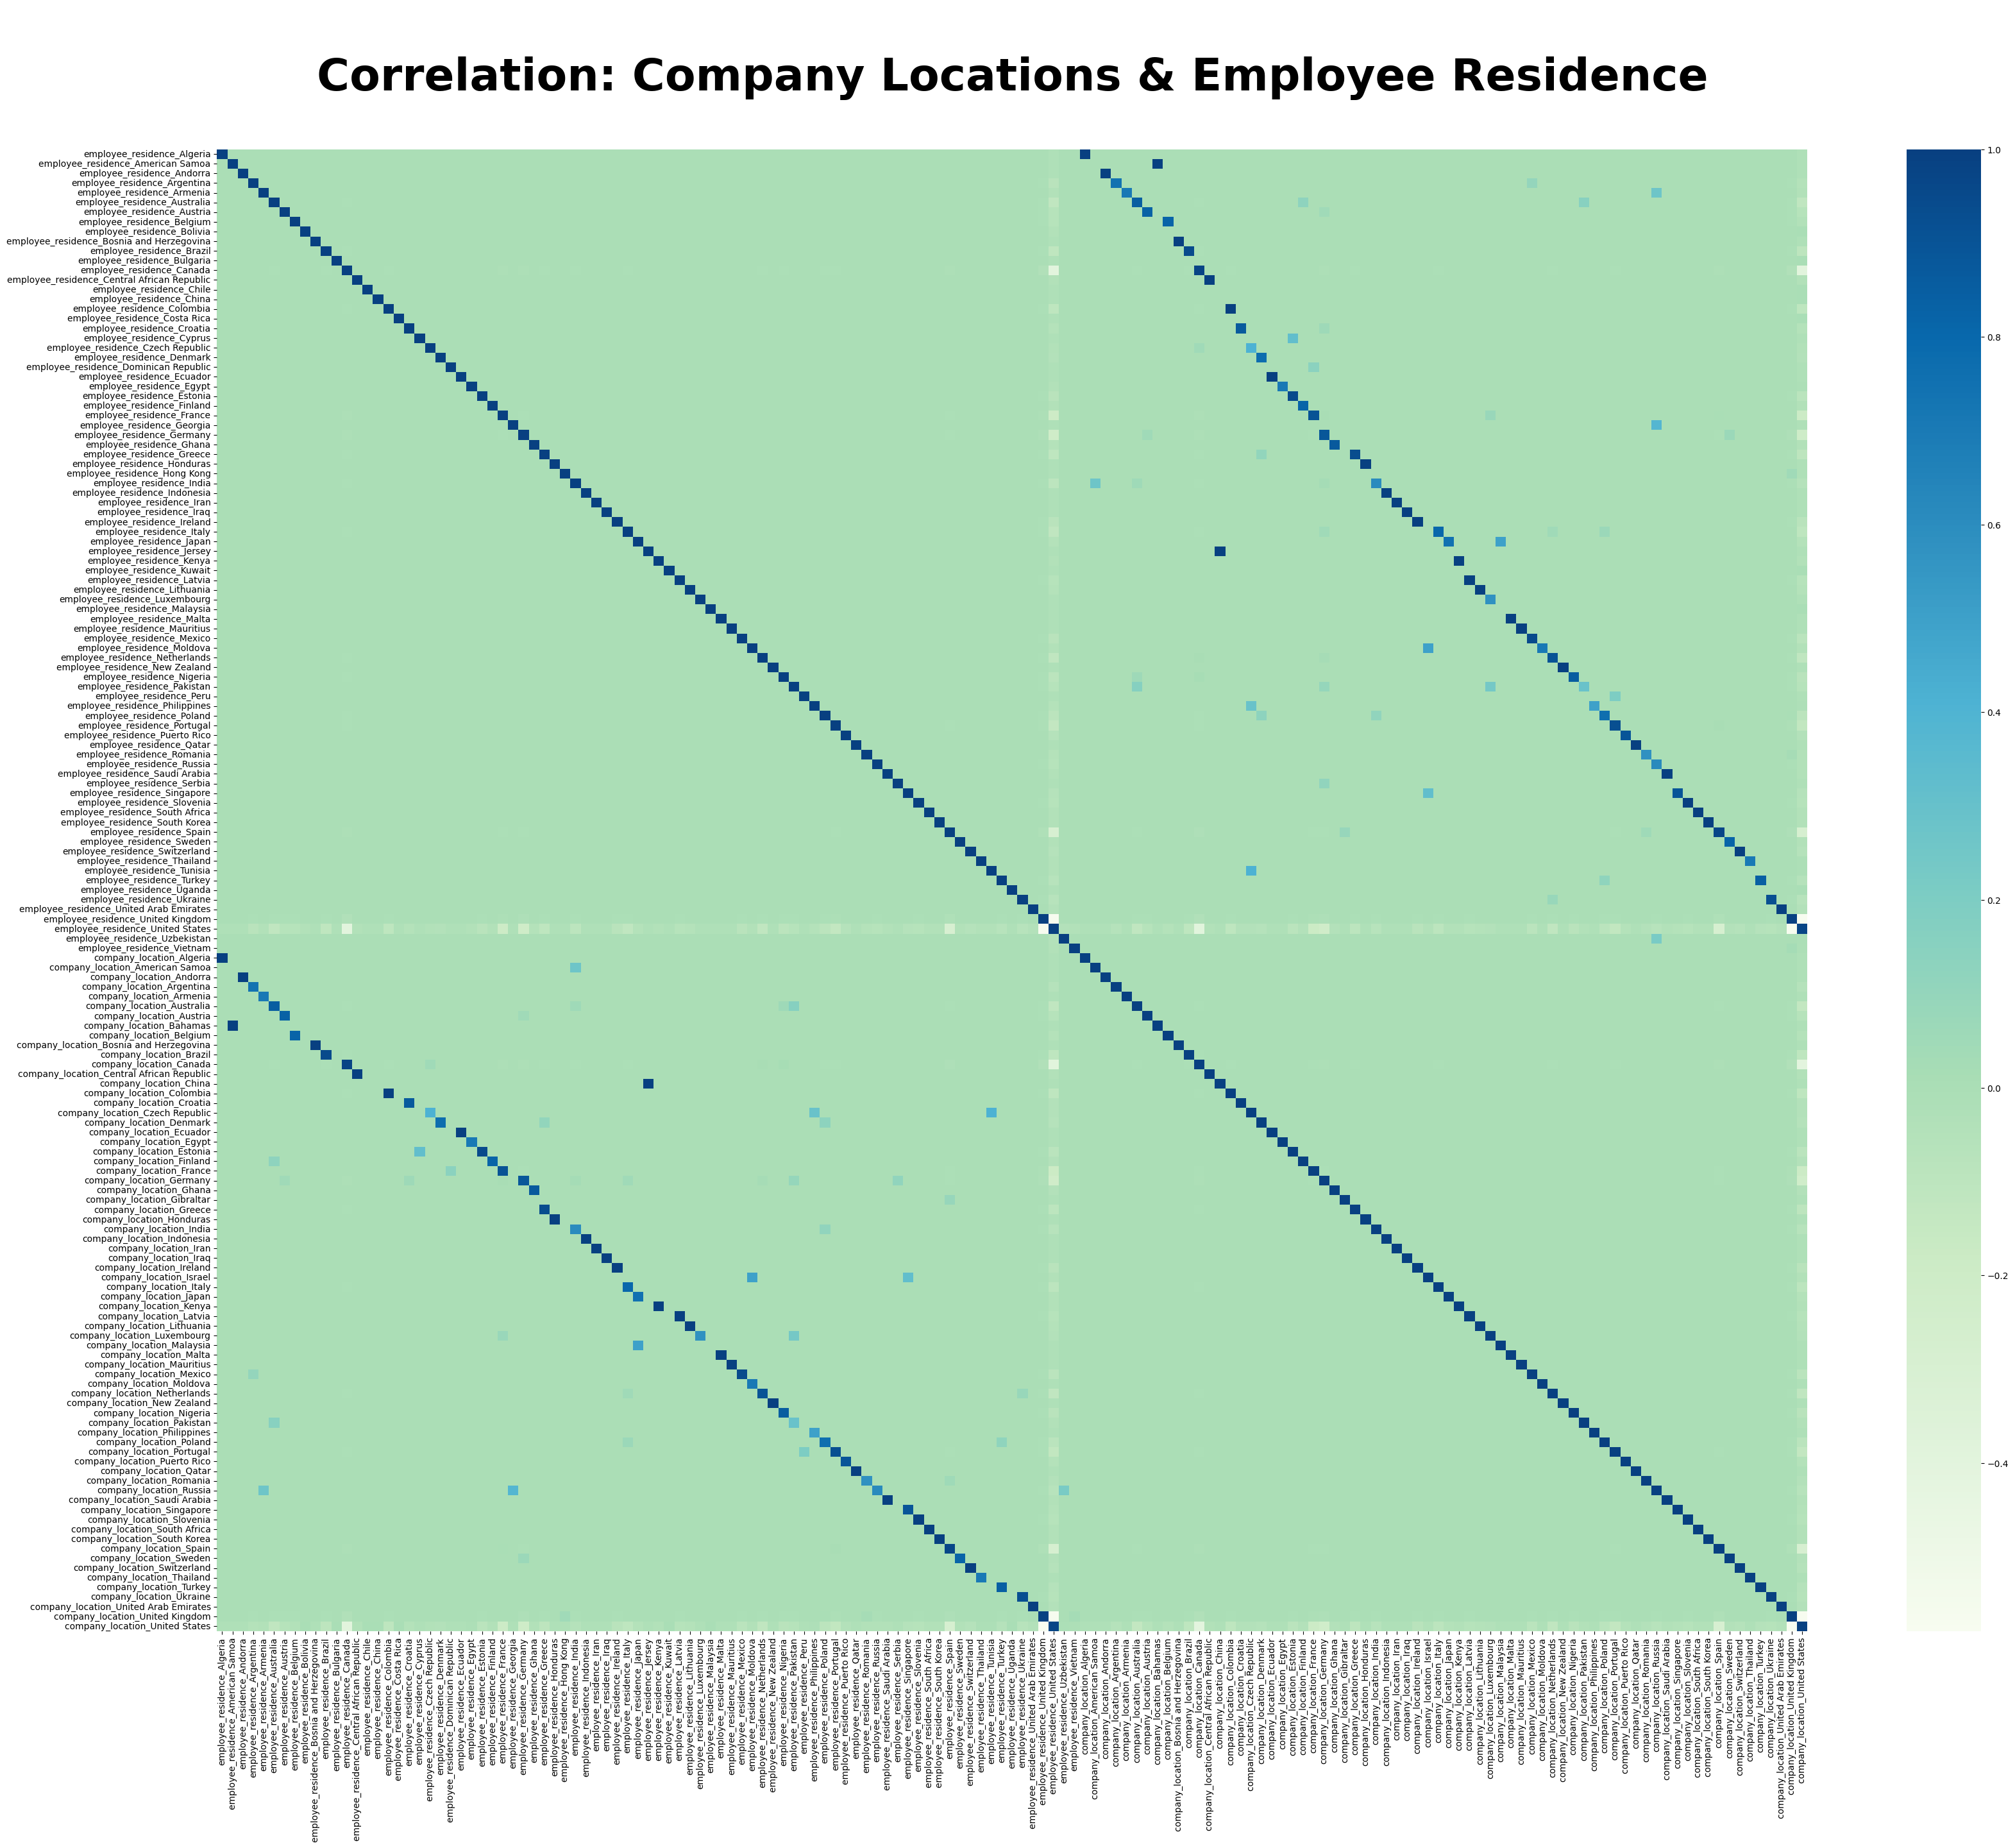

In [274]:


plt.figure(figsize=(40,30))

plt.title("\nCorrelation: Company Locations & Employee Residence\n",fontsize=50,weight="bold") 
sns.heatmap(encoded_features.corr(),cmap="GnBu",annot=False)
plt.savefig('Correlation',bbox_inches='tight')
plt.show()

In [284]:

import plotly.express as px

distinct_job_titles_per_year = df.groupby('YEAR')['job_title'].nunique().reset_index(name='Distinct Job Categories')



# Plot interactive line plot
fig = px.line(distinct_job_titles_per_year, x='YEAR', y='Distinct Job Categories', 
              title='Distinct Count of Job Titles Year-wise', labels={'YEAR': 'Year', 'Distinct Job Titles': 'Count of Distinct Job Titles'},
              line_shape='linear')

fig.update_layout(
    plot_bgcolor='rgb(37, 40, 46)',  # Set plot background color to black
    paper_bgcolor='rgb(37, 40, 46)',  # Set paper background color to black
    font=dict(color='rgb(247, 80, 42)',size=18,),
    xaxis=dict(
        tickmode='linear',
        dtick=1,
        gridcolor='rgb(247, 80, 42)'),
    yaxis=dict(
        gridcolor='rgb(247, 80, 42)'),
    title=dict(x=0.5, xanchor='center')    
)
fig.write_html('plot.html')
fig.show()

